### Importing Modules and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Brief information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Observing target variable 'DEATH_EVENT'. Note that binary value 0 represents False (patient survived) and 1 represents True (patient deceased).

### Death Event Distribution

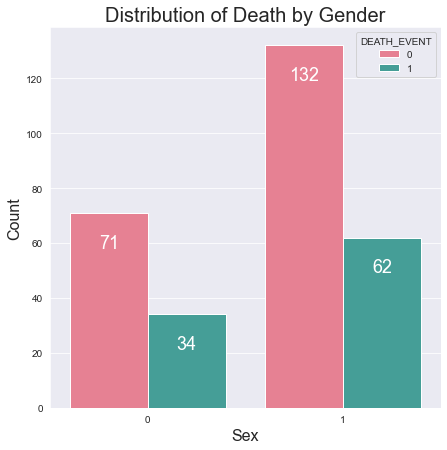

In [4]:
plt.figure(figsize=(7,7))

ax = sns.countplot(x="sex", hue="DEATH_EVENT", data=df, palette="husl")
ax.set_title('Distribution of Death by Gender', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

Measure how many missing values contained in the dataset.

In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### Data Preprocessing

Since types of categorical variables are int, we separated them to three types for training purpose.

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 299
Variables: 13
cat_cols: 6
num_cols: 7
cat_but_car: 0
num_but_cat: 6


In [9]:
### Show lists of numerical and categorical variables
print(f"Columns belonged to numerical variables: {num_cols}")
print(f"Columns belonged to categorical variables: {cat_cols}")

Columns belonged to numerical variables: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Columns belonged to categorical variables: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


In [10]:
stats_df = df[num_cols].describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_fields = ['mean','25%','50%','75%', 'range', 'min', 'max']

stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
round(stats_df, 3)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
mean,60.834,581.839,38.084,263358.029,1.394,136.625,130.261
25%,51.000,116.500,30.000,212500.000,0.900,134.000,73.000
median,60.000,250.000,38.000,262000.000,1.100,137.000,115.000
75%,70.000,582.000,45.000,303500.000,1.400,140.000,203.000
range,55.000,7838.000,66.000,824900.000,8.900,35.000,281.000
min,40.000,23.000,14.000,25100.000,0.500,113.000,4.000
max,95.000,7861.000,80.000,850000.000,9.400,148.000,285.000


We cast binary/boolean variables to 'category' type.

In [11]:
list(filter(lambda x: x if len(df[x].unique()) <= 3 else None, df.columns))

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [12]:
df[cat_cols] = df[cat_cols].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

### Correlation Heatmap

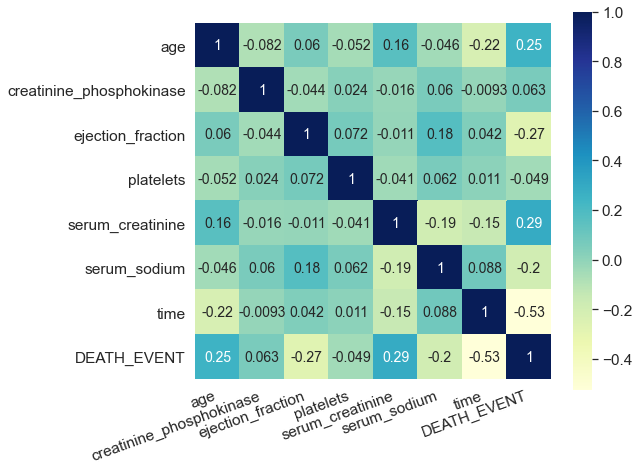

In [14]:
corr_1 = df.astype({'DEATH_EVENT': 'int64'}).corr()

plt.figure(figsize=(9,7))
sns.set(font_scale=1.4)
sns.heatmap(corr_1, cmap='YlGnBu', annot_kws={"size": 14},
            annot=True, square=True, cbar_kws={'aspect':20})
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

In [15]:
df[num_cols].corrwith(df["DEATH_EVENT"]).to_frame('correlation')

,correlation
age,0.253729
creatinine_phosphokinase,0.062728
ejection_fraction,-0.268603
platelets,-0.049139
serum_creatinine,0.294278
serum_sodium,-0.195204
time,-0.526964


#### Correlation between categorical variables with Cramer's V

In [16]:
import scipy.stats as ss

def cramers_corrected_stat(confusion_matrix):
    """ 
    Description: Calculates Cramer's V statistical correlation on categorical relationships
    Return: square root of correlation
    """
    try:
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
    except ValueError:
        return np.Nan
    
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    
    r,k = confusion_matrix.shape
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corrected = r - ((r-1)**2)/(n-1)
    k_corrected = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2_corrected / min((k_corrected-1), (r_corrected-1)))

def categorical_corr_matrix(dataframe):
    """ 
    Description: Screening correlation matrix for categorical variables
    Return: correlation matrix
    """
    categories = dataframe.select_dtypes(include='category')
    columns = categories.columns
    n = len(columns)
    corr_matrix = pd.DataFrame(np.zeros(shape=(n,n)), index=columns, columns=columns)
    
    for column_1 in columns:
        for column_2 in columns:
            if column_1 == column_2:
                corr_matrix.loc[column_1, column_2] = 1
                break
            dataframe_crosstab = pd.crosstab(dataframe[column_1], dataframe[column_2], dropna=False)
            corr_matrix.loc[column_1, column_2] = cramers_corrected_stat(dataframe_crosstab)
    
    # Transpose to yield correlation matrix
    corr_matrix += np.tril(corr_matrix, k=-1).T
    return corr_matrix

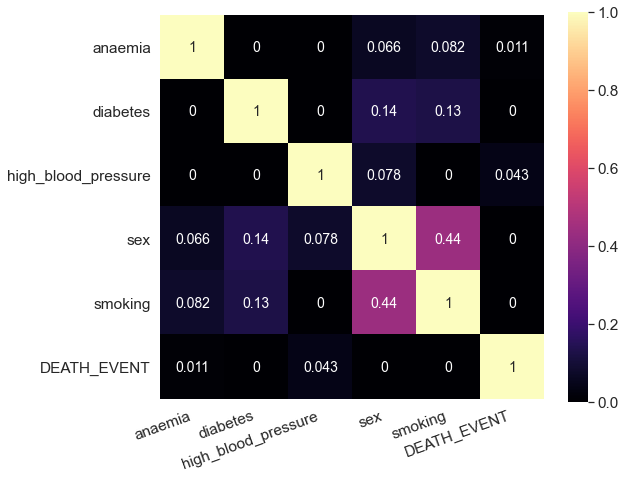

In [17]:
corr_2 = categorical_corr_matrix(df)

plt.figure(figsize=(9,7))
sns.set(font_scale=1.4)
sns.heatmap(corr_2, cmap='magma', annot_kws={"size": 14},
            annot=True, square=True, cbar_kws={'aspect':20})
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

In [18]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df["DEATH_EVENT"])
    
df_mi = df[cat_cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
DEATH_EVENT,0.627674
high_blood_pressure,0.003115
anaemia,0.002188
smoking,0.000080
sex,0.000009
diabetes,0.000002


Analysis on two correlations reveals a considerably high relationship on 'DEATH_EVENT' with features 'age', 'ejection_fraction', 'serum_creatinine', and 'time'.

### Scatterplot

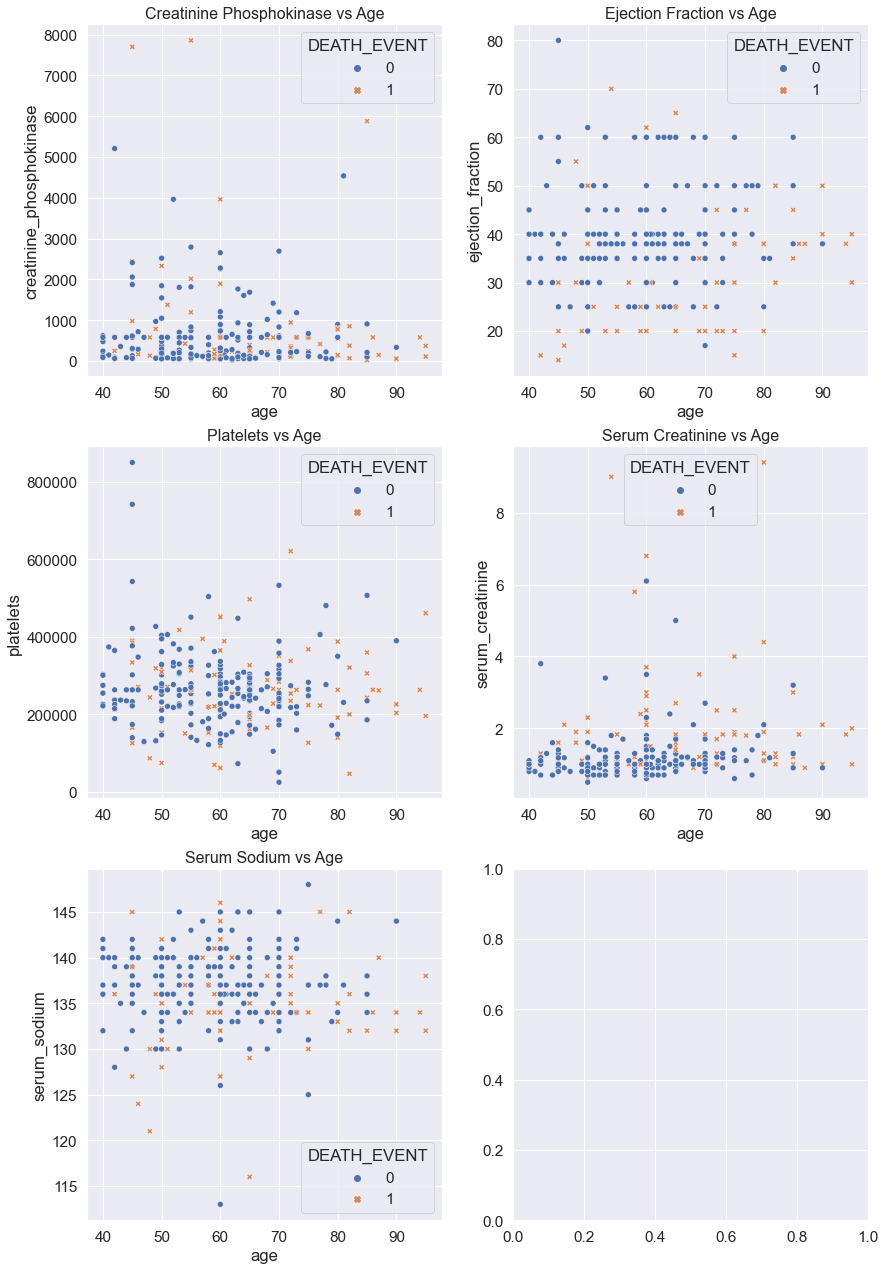

In [19]:
fig, ax = plt.subplots(3, 2, figsize=(14,22))

sns.scatterplot(data=df, x="age", y="creatinine_phosphokinase", ax=ax[0][0], hue="DEATH_EVENT", style="DEATH_EVENT")
ax[0][0].set_title("Creatinine Phosphokinase vs Age", fontsize=16)
sns.scatterplot(data=df, x="age", y="ejection_fraction", ax=ax[0][1], hue="DEATH_EVENT", style="DEATH_EVENT")
ax[0][1].set_title("Ejection Fraction vs Age", fontsize=16)
sns.scatterplot(data=df, x="age", y="platelets", ax=ax[1][0], hue="DEATH_EVENT", style="DEATH_EVENT")
ax[1][0].set_title("Platelets vs Age", fontsize=16)
sns.scatterplot(data=df, x="age", y="serum_creatinine", ax=ax[1][1], hue="DEATH_EVENT", style="DEATH_EVENT")
ax[1][1].set_title("Serum Creatinine vs Age", fontsize=16)
sns.scatterplot(data=df, x="age", y="serum_sodium", ax=ax[2][0], hue="DEATH_EVENT", style="DEATH_EVENT")
ax[2][0].set_title("Serum Sodium vs Age", fontsize=16)

plt.show()

### BoxPlot

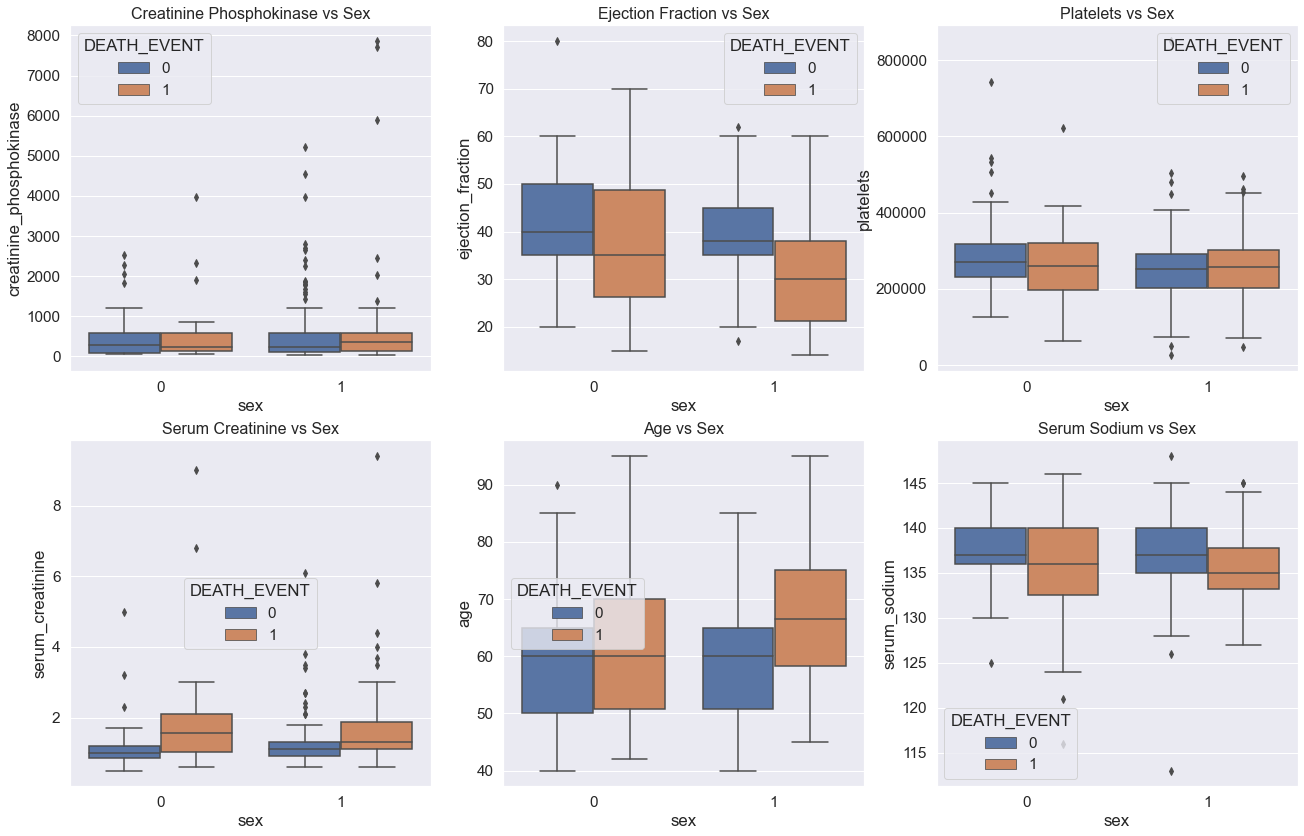

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(22,14))

sns.boxplot(data=df, x="sex", y="creatinine_phosphokinase", ax=ax[0][0], hue="DEATH_EVENT")
ax[0][0].set_title("Creatinine Phosphokinase vs Sex", fontsize=16)
sns.boxplot(data=df, x="sex", y="ejection_fraction", ax=ax[0][1], hue="DEATH_EVENT")
ax[0][1].set_title("Ejection Fraction vs Sex", fontsize=16)
sns.boxplot(data=df, x="sex", y="platelets", ax=ax[0][2], hue="DEATH_EVENT")
ax[0][2].set_title("Platelets vs Sex", fontsize=16)
sns.boxplot(data=df, x="sex", y="serum_creatinine", ax=ax[1][0], hue="DEATH_EVENT")
ax[1][0].set_title("Serum Creatinine vs Sex", fontsize=16)
sns.boxplot(data=df, x="sex", y="age", ax=ax[1][1], hue="DEATH_EVENT")
ax[1][1].set_title("Age vs Sex", fontsize=16)
sns.boxplot(data=df, x="sex", y="serum_sodium", ax=ax[1][2], hue="DEATH_EVENT")
ax[1][2].set_title("Serum Sodium vs Sex", fontsize=16)

plt.show()

### Outlier Detection

Observation on dataset from scatterplot reveals outliers on column 'ap_hi','ap_lo','height',and 'weight', which means its presences would be lead to poor prediction for SVM and logistic regression. Hence, outliers replacement is conducted to form the data to be more conform with assumption of classifiers.

In [21]:
## Function for yielding quantile-based threshold 
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## Function to check outlier
def check_outlier(dataframe, col_name, q1=0.10, q3=0.90):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

Check numerical variables for outliers.

In [22]:
for col in num_cols:
    print(col, check_outlier(df, col))

age False
creatinine_phosphokinase True
ejection_fraction False
platelets True
serum_creatinine True
serum_sodium True
time False


In [23]:
### Retain original dataframe and create copy
df_copy = df.copy()

### Distribution on Numerical (Continuous) Variables

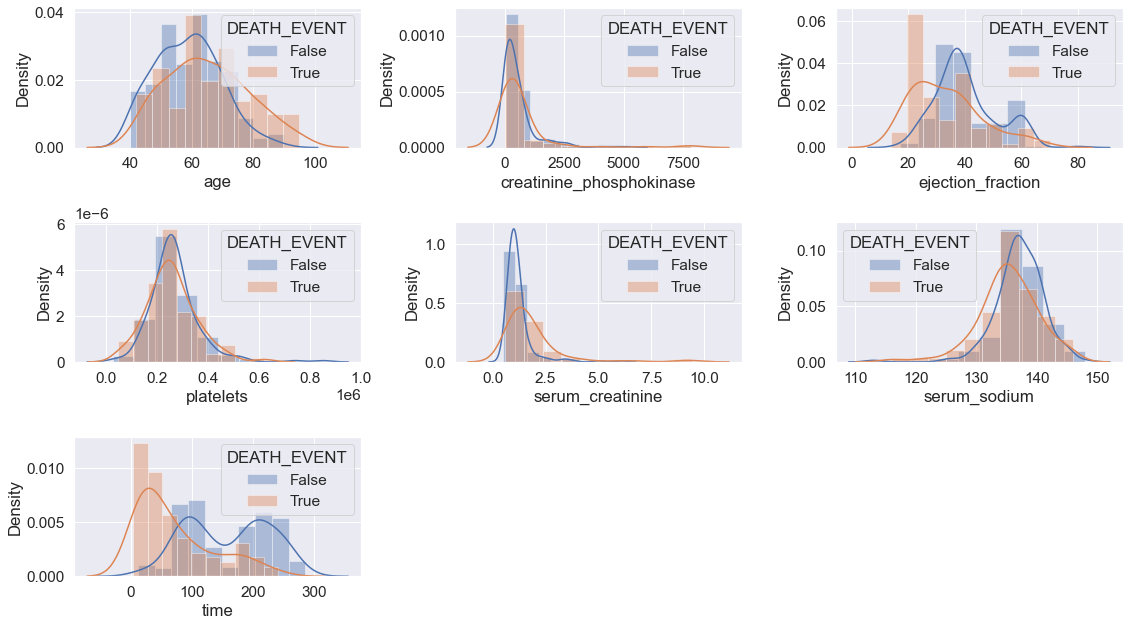

In [24]:
df_groupby = df.groupby('DEATH_EVENT')
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(16,9))
title = list(df.select_dtypes(exclude='category'))

ax_titles = zip(axis.flat, title)

for ax, title in ax_titles:
    sns.distplot(df_groupby.get_group(0)[title], bins=10, ax=ax, label='False')
    sns.distplot(df_groupby.get_group(1)[title], bins=10, ax=ax, label='True')
    ax.legend(title='DEATH_EVENT')
    
axis.flat[-1].remove()
axis.flat[-2].remove()
fig.tight_layout()

In [25]:
df_copy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
